In [1]:
from sklearn.cluster import KMeans
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
%matplotlib inline
os.chdir('D:\Simplilearn Goal\Machine Learning course\Demo Datasets\Lesson 7\Lesson 7-Unsupervised Learning')

Problem Statement:
There is an image in the name of “tiger.png”. Use k means clustering with k set to 16 and cluster the
image, which means that you want to keep just 16 colors in our compressed image.
Objective:
Open and display the image “tiger.png”. Convert the image into numpy array, so that it can be used in further
processing. Find out the dimensions of the image and convert it into a two dimensional array ( U se k means clustering for
image segmentation , reducing the image into 16 colors).
Note:

In [38]:
img=Image.open('tiger.png')
imp_np=np.asarray(img)   #Convert into numpy array objects
imp_np[0:2]

array([[[164, 160, 159],
        [165, 161, 160],
        [164, 163, 161],
        ...,
        [160, 128,  90],
        [158, 125,  90],
        [161, 128,  93]],

       [[164, 160, 159],
        [164, 160, 159],
        [163, 162, 160],
        ...,
        [164, 132,  94],
        [162, 129,  94],
        [157, 124,  89]]], dtype=uint8)

In [42]:
imp_np.shape

(720, 1280, 3)

In [40]:
pixels=imp_np.reshape(imp_np.shape[0]*imp_np.shape[1],imp_np.shape[2]) #Reshape into two dimensonal array

In [41]:
pixels.shape

(921600, 3)

In [43]:
#fitting the model
model=KMeans(n_clusters=16)
model.fit(pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=16, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [44]:
model.labels_

array([12, 12, 12, ..., 11, 11, 11])

In [45]:
model.cluster_centers_

array([[ 51.18959344,  41.48315485,  35.91072882],
       [176.07343268, 176.68626067, 176.98778913],
       [137.11854513, 109.05826224,  84.15477661],
       [ 92.80186755,  89.6612626 ,  80.27678735],
       [230.65543957, 229.58584025, 229.79032676],
       [130.4546545 , 134.51155579, 123.63796735],
       [ 24.63382208,  18.99449513,  16.7081898 ],
       [178.62728706, 131.79150146, 107.66110925],
       [203.22072839, 200.8400583 , 199.47407723],
       [ 97.41144979, 139.82566272,  84.45091097],
       [106.74814003,  69.95795964,  43.75458622],
       [109.06960096, 109.71605694, 104.6439926 ],
       [153.45443441, 156.14577362, 154.42563768],
       [212.05168856, 169.32503521, 134.97821743],
       [ 68.80784071,  67.47965206,  57.02368885],
       [ 57.9484831 , 124.60846576,  40.51097949]])

In [46]:
pixel_centroids=model.labels_
cluster_center=model.cluster_centers_

#model.labels _ is used to obtain the number of cluster that is assigned to each data point or each pixel.
#model.cluster_centers  gives us the coordinates or the RGB values of the 16 cluster

In [47]:
final_zeros=np.zeros((pixel_centroids.shape[0],3))
for cluster_no in range(16):
    final_zeros[pixel_centroids==cluster_no]=cluster_center[cluster_no]
final_zeros

array([[153.45443441, 156.14577362, 154.42563768],
       [153.45443441, 156.14577362, 154.42563768],
       [153.45443441, 156.14577362, 154.42563768],
       ...,
       [109.06960096, 109.71605694, 104.6439926 ],
       [109.06960096, 109.71605694, 104.6439926 ],
       [109.06960096, 109.71605694, 104.6439926 ]])

In [48]:
comp_image=final_zeros.reshape(imp_np.shape[0],imp_np.shape[1],imp_np.shape[2]) #Compressed Image obtained from kmeans model
comp_image.shape

(720, 1280, 3)

In [49]:
comp_image=Image.fromarray(np.uint8(comp_image)) #Building an image from an numpy array
comp_image.save('tiger_compressed.png')

In [50]:
img1=mpimg.imread('tiger.png')
img2=mpimg.imread('tiger_compressed.png')

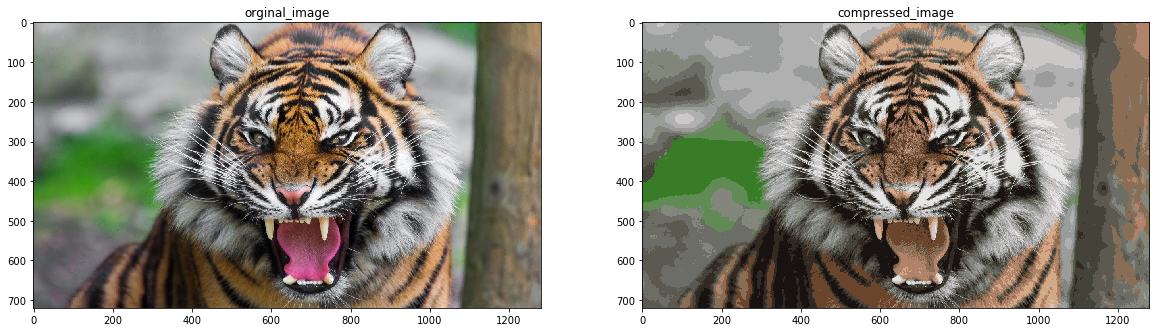

In [51]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,20))
ax1.imshow(img1)
ax1.set_title('orginal_image')
ax2.imshow(img2)
ax2.set_title('compressed_image')
plt.show()